## Examples

In [1]:
from dag import *

Here we will run through a few examples. We will use the 5 games proposed in Judea Pearl's [The Book of Why](https://www.amazon.com/Book-Why-Science-Cause-Effect/dp/046509760X).

### Game 1

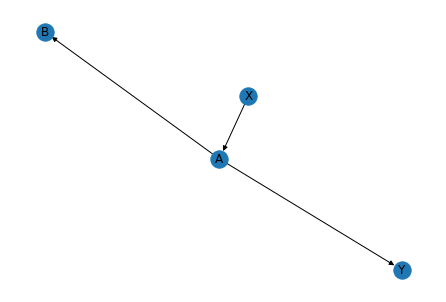

In [2]:
scm = {
    "X": ["A"],
    "Y": [],
    "A": ["Y", "B"],
    "B": []
}
outcome = "Y"
exposure = "X"
# instantiate the class:
dag = Dag(scm, outcome, exposure)
dag.plot()

In this case X has no parents so (only) the empty set is a VAD:

In [3]:
print(dag.is_valid_adjustment_set([]))
print(dag.is_valid_adjustment_set(["B"]))

True
Proposed set includes descendant of exposure variable.
False


### Game 2

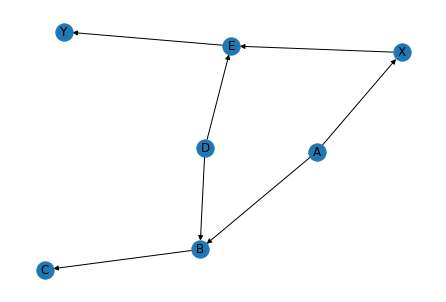

In [4]:
scm = {
    "X": ["E"],
    "Y": [],
    "A": ["B","X"],
    "B": ["C"],
    "C": [],
    "D": ["B","E"],
    "E": ["Y"]
}
outcome = "Y"
exposure = "X"
# instantiate the class:
dag = Dag(scm, outcome, exposure)
dag.plot()

In this case we want to avoid conditioning on B since it is a collider.

In [5]:
print(dag.is_valid_adjustment_set([]))
print(dag.is_valid_adjustment_set(["C","D"]))
print(dag.is_valid_adjustment_set(["B"]))
print(dag.is_valid_adjustment_set(["C"]))

True
True
False
True


### Game 3

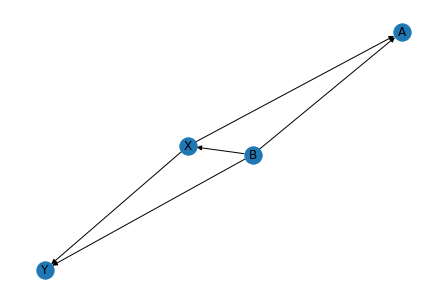

In [6]:
scm = {
    "X": ["Y","A"],
    "Y": [],
    "A": [],
    "B": ["X","A","Y"]
}
outcome = "Y"
exposure = "X"
# instantiate the class:
dag = Dag(scm, outcome, exposure)
dag.plot()

Here B is a confounder and needs to be adjusted for:

In [7]:
print(dag.is_valid_adjustment_set([]))
print(dag.is_valid_adjustment_set(["B"]))

False
True


### Game 4

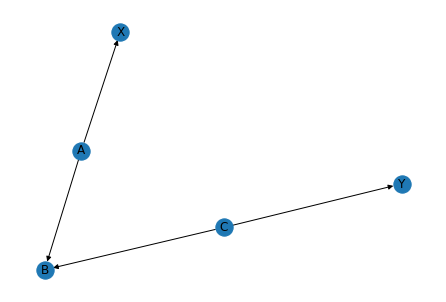

In [8]:
scm = {
    "X": [],
    "Y": [],
    "A": ["X","B"],
    "B": [],
    "C": ["B", "Y"]
}
outcome = "Y"
exposure = "X"
# instantiate the class:
dag = Dag(scm, outcome, exposure)
dag.plot()

In this graph there is no causal path from X to Y and our algorithm throws an exception:

In [9]:
print(dag.is_valid_adjustment_set([]))
print(dag.is_valid_adjustment_set(["B"]))

Exception: Exposure has no descendants. No causal effect to measure.

### Game 5

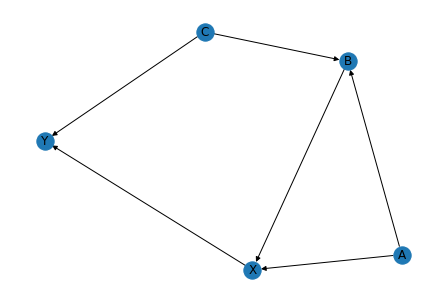

In [10]:
scm = {
    "X": ["Y"],
    "Y": [],
    "A": ["X","B"],
    "B": ["X"],
    "C": ["B", "Y"]
}
outcome = "Y"
exposure = "X"
# instantiate the class:
dag = Dag(scm, outcome, exposure)
dag.plot()

In [11]:
print(dag.is_valid_adjustment_set([]))
print(dag.is_valid_adjustment_set(["C"]))
print(dag.is_valid_adjustment_set(["B","A"]))
print(dag.is_valid_adjustment_set(["B","C"]))
print(dag.is_valid_adjustment_set(["B"]))

False
True
True
True
False
